In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
• Sex: male or female(Nominal)
• Age: Age of the patient
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [55]:
data_set = pd.read_csv("framingham.csv")
data_set
#y(predict varibale) --> Ten Year CHD 1--> Yes and 0 --> No


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [56]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [58]:
def capping(col_name):
    maximum = data_set[col_name].quantile(0.75)
    minimum = data_set[col_name].quantile(0.25)
    iqr = maximum - minimum
    data_set.loc[(data_set[col_name] > 1.5*Iqr_bmi + max_bmi),col_name] = 1.5*Iqr_bmi + max_bmi
    data_set.loc[(data_set[col_name] < 1.5*Iqr_bmi - min_bmi),col_name] = 1.5*Iqr_bmi - min_bmi

In [59]:
def imputing (col_name,function):
    if function == "mean":
        data_set[col_name].fillna(data_set[col_name].mean(),inplace = True)
    elif  function == "median":
        data_set[col_name].fillna(data_set[col_name].median(),inplace = True)
    else:
        print("Provide valid function name")

Eduction doesnot play a key role in detection of heart diesease and more null values are been found. So drop it 

In [50]:
data_set.drop("education",axis = 1 ,inplace = True)

In [26]:
data_set

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


<Axes: >

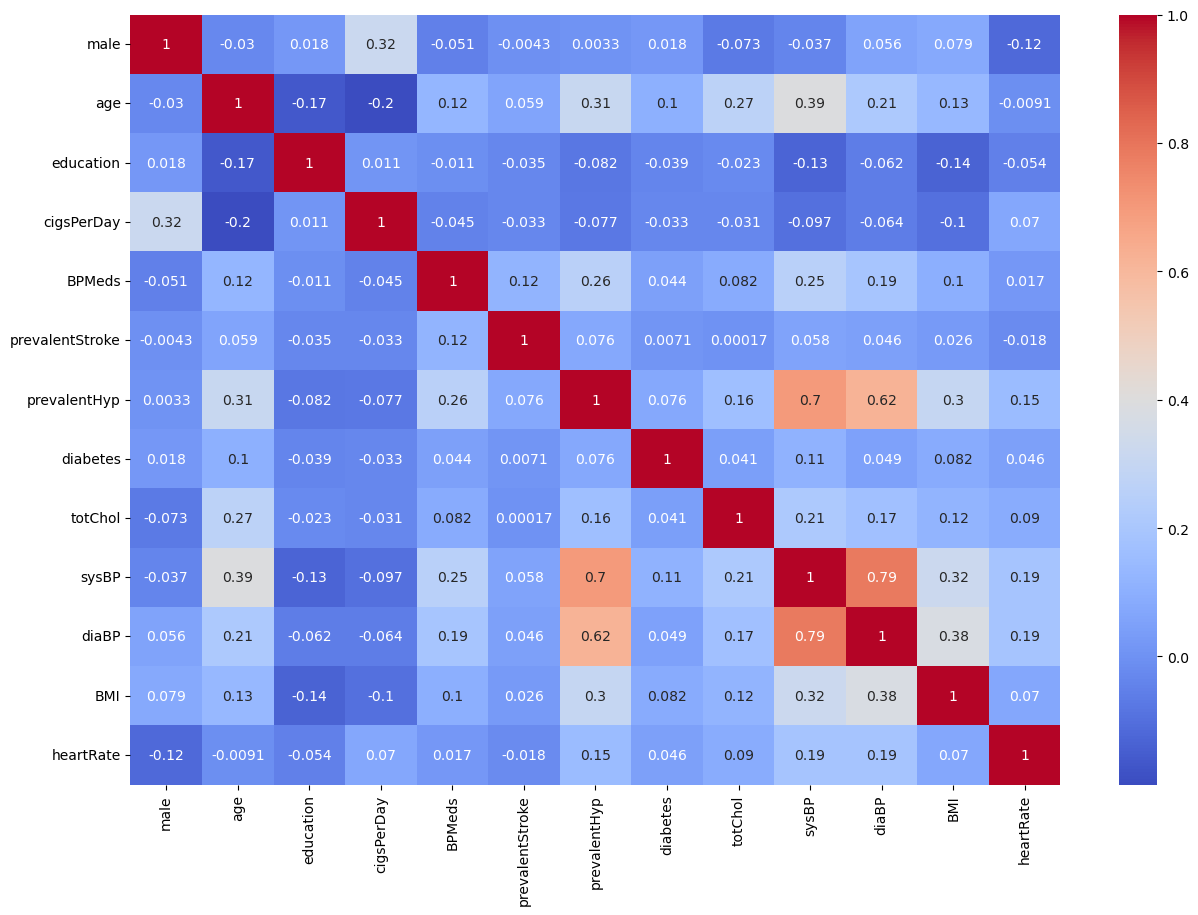

In [123]:
corr = data_set.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(15 , 10))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'coolwarm')

In [61]:
data_set.drop(["currentSmoker"],inplace = True ,  axis = 1)


In [63]:
data_set.drop("glucose",inplace = True ,axis = 1)

# Data Preprocessing 

# Handling outliers and Missing Values 

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\2113513884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["cigsPerDay"])


<Axes: xlabel='cigsPerDay', ylabel='Density'>

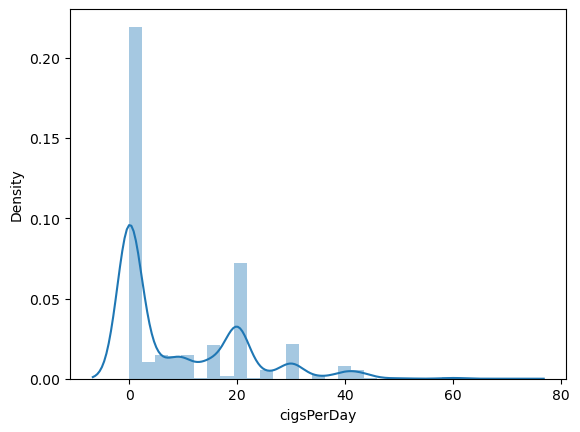

In [65]:
sns.distplot(data_set["cigsPerDay"])
#hence the distibution is median the preffered imputation is median imputaion 

In [66]:
data_set["cigsPerDay"].isnull().sum()

29

In [68]:
imputing("cigsPerDay","median")

In [69]:
data_set["cigsPerDay"].isnull().sum()

0

<Axes: >

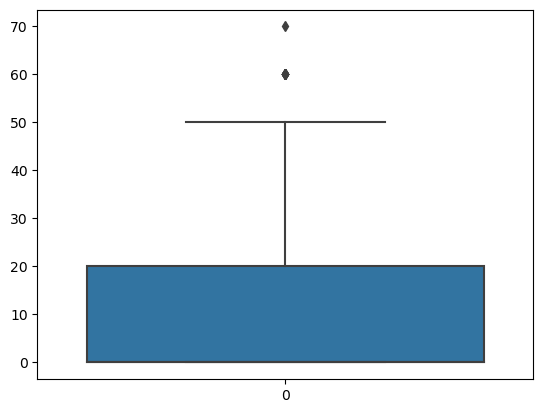

In [70]:
sns.boxplot(data=data_set["cigsPerDay"])

We can see there are outliers in the data_set of cigs_perDay Column 

In [71]:
# There are lots of data having the outliers. So we are going for the procedure called capping
capping("cigsPerDay")
data_set

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,4.0,0.000,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,2.0,0.000,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1.0,20.000,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,3.0,30.000,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,3.0,23.000,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1.000,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,1
4234,1,51,3.0,35.495,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,0
4235,0,48,2.0,20.000,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1.0,15.000,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0


<Axes: >

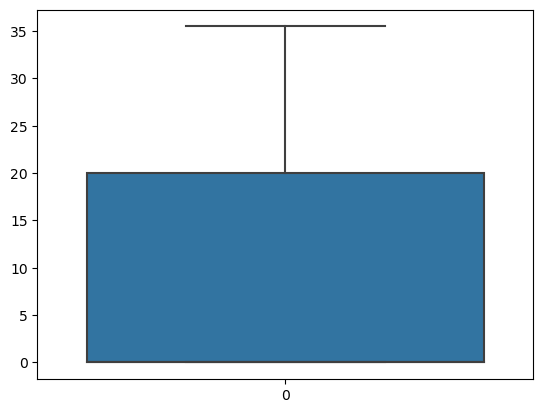

In [72]:
sns.boxplot(data=data_set["cigsPerDay"])

Next Column is BPmeds 

In [12]:
data_set["BPMeds"].value_counts()

BPMeds
0.0    4061
1.0     124
Name: count, dtype: int64

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\2552386610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["BPMeds"])


<Axes: xlabel='BPMeds', ylabel='Density'>

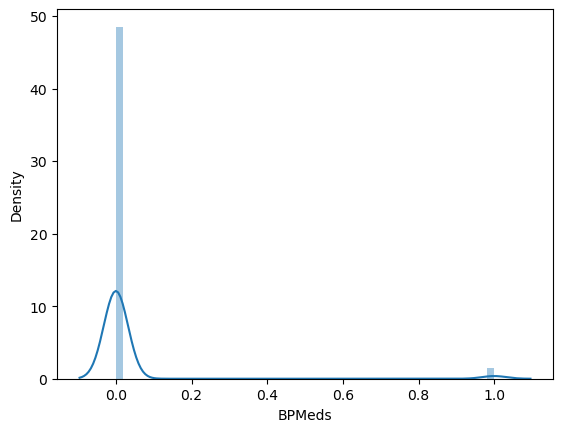

In [13]:
sns.distplot(data_set["BPMeds"])

Its a Sqwed once , Hence the missing values will be replaced by Median 

In [78]:
imputing("BPMeds","median")
data_set["BPMeds"].isnull().sum()

0

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\2552386610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["BPMeds"])


<Axes: xlabel='BPMeds', ylabel='Density'>

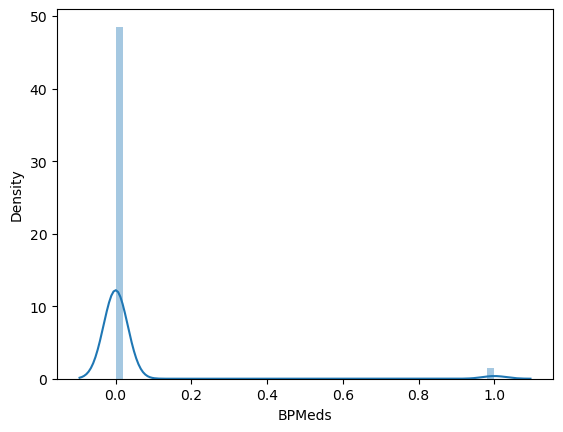

In [74]:
sns.distplot(data_set["BPMeds"])

In [75]:
data_set["age"].isnull().sum()

0

<Axes: >

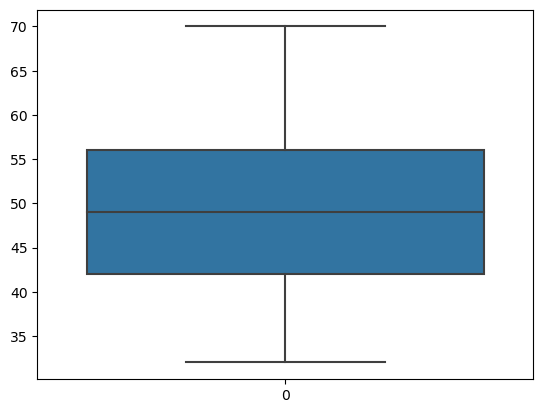

In [76]:
sns.boxplot(data_set["age"])

## Column "BMI"

In [ ]:


sns.distplot(data_set["BMI"])

<Axes: >

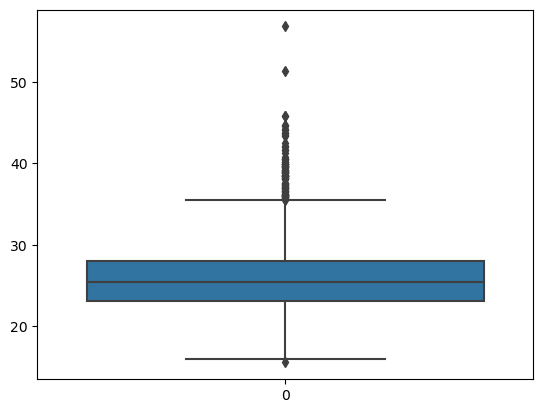

In [20]:
sns.boxplot(data_set["BMI"])

In [23]:
max_bmi = data_set["BMI"].quantile(0.75)
min_bmi = data_set["BMI"].quantile(0.25)
Iqr_bmi = max_bmi - min_bmi
data_set[(data_set["BMI"] > 1.5*Iqr_bmi + max_bmi) | (data_set["BMI"] < 1.5*Iqr_bmi - min_bmi)]


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
35,1,37,0,0.0,0.0,0,1,0,225.0,124.5,92.5,38.53,95.0,83.0,0
37,1,52,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
78,0,45,0,0.0,0.0,0,1,0,183.0,151.0,101.0,45.80,80.0,63.0,0
87,0,61,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
108,0,66,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4001,0,58,0,0.0,0.0,0,1,0,385.0,165.0,95.0,41.66,82.0,91.0,0
4132,0,57,0,0.0,0.0,0,1,0,259.0,170.0,101.0,38.17,85.0,75.0,0
4190,0,41,0,0.0,0.0,0,1,0,229.0,150.0,89.0,36.07,75.0,92.0,0
4215,0,63,0,0.0,0.0,0,1,1,236.0,155.0,82.0,39.17,78.0,79.0,0


In [29]:
capping("BMI")

<Axes: >

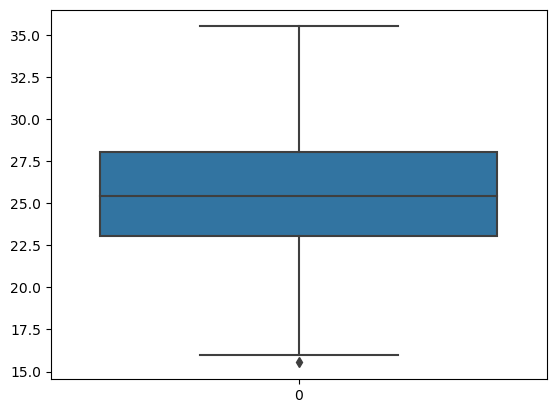

In [31]:
sns.boxplot(data_set["BMI"])

In [32]:
data_set["BMI"].isnull().sum()

19

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\133115271.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["BMI"])


<Axes: xlabel='BMI', ylabel='Density'>

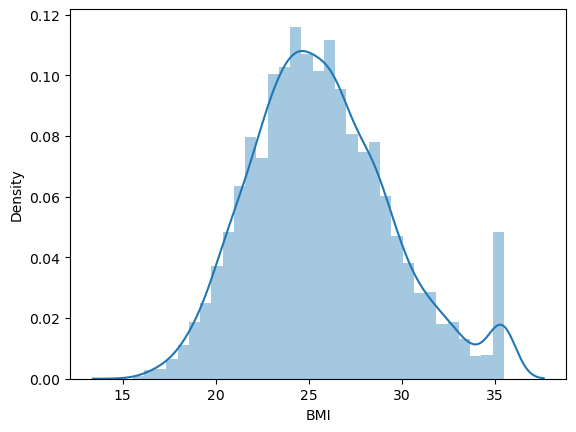

In [33]:
sns.distplot(data_set["BMI"])

In [82]:
# Since the graph is almost Normal we use mean() to impute the values 
imputing("BMI","mean")

In [80]:
data_set["diabetes"].isnull().sum()

0

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\1830361118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["education"])


<Axes: xlabel='education', ylabel='Density'>

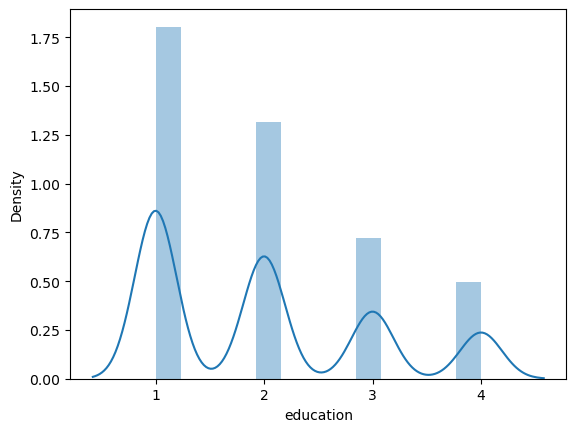

In [100]:
sns.distplot(data_set["education"])

In [102]:
data_set["education"].dropna(axis = 0,inplace = True)

In [104]:
data_set = data_set[data_set['education'].notna()]

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\3400307705.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_set["totChol"])


<Axes: xlabel='totChol', ylabel='Density'>

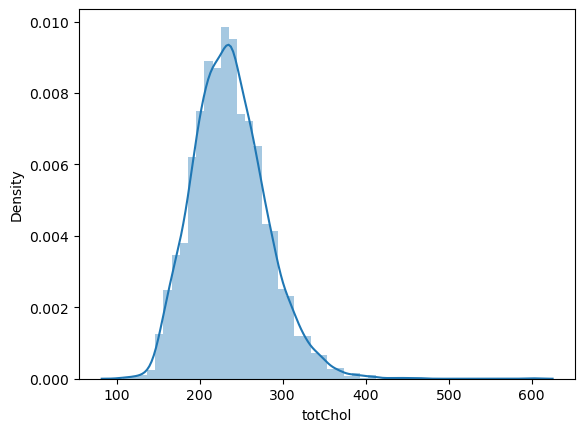

In [106]:
sns.distplot(data_set["totChol"])

<Axes: >

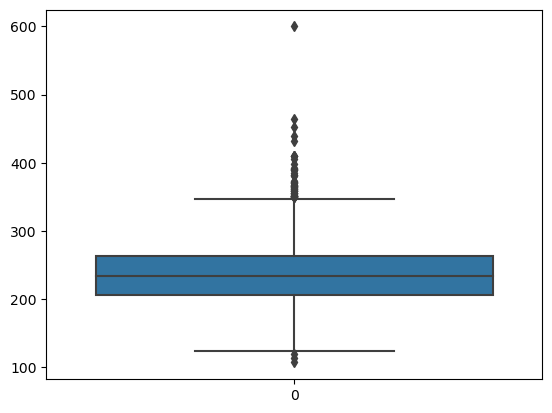

In [107]:
sns.boxplot(data_set["totChol"])

In [114]:
maxi = data_set["totChol"].quantile(0.75)
mini = data_set["totChol"].quantile(0.25)
iqr = maxi - mini 
(data_set.loc[(data_set["totChol"] > 1.5*iqr + maxi) | (data_set["totChol"] < 1.5*iqr - mini),"totChol"]).value_counts().sum()

52

In [115]:
imputing("totChol","mean")

C:\Users\gandl\AppData\Local\Temp\ipykernel_13860\1742063035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set[col_name].fillna(data_set[col_name].mean(),inplace = True)


In [121]:
data_set = data_set[data_set['heartRate'].notna()]

# Model Training 

In [135]:
#Splitting the data into train and test 
x_train,x_test,y_train,y_test = train_test_split(data_set.iloc[:,:-1],data_set.iloc[:,-1],test_size = 0.2)

In [137]:
logistic_regression = LogisticRegression(max_iter = 100)
logistic_regression.fit(x_train,y_train)

C:\Users\gandl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
y_pred = logistic_regression.predict(x_test)

In [141]:
(logistic_regression.score(x_test,y_test))*100

86.45707376058041